In [1]:
# 從 scikit learn , 載入鳶尾花資料
from sklearn.datasets import load_iris
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [1]:
import pandas as pd
df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
df["target"] = iris["target"]
df.to_csv ("iris.csv", encoding="utf-8", index=False)
df

NameError: name 'iris' is not defined

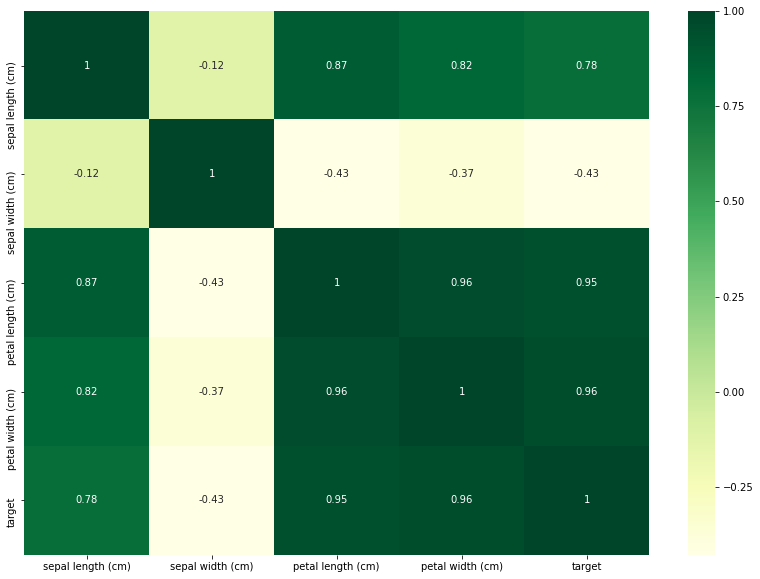

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
# 直接顯示圖形,不用一直plot.show()
%matplotlib inline
plt.figure(figsize=(14,10))
sns.heatmap(df.astype("float").corr(), cmap="YlGn", annot=True)

In [4]:
# 看一下各個屬性間的相關性, 
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


In [5]:
from sklearn.model_selection import train_test_split
# 90%資料做 train, 10%資料 做 test
# train_test_split -> (特徵90%, 特徵10%, 目標90%, 目標10%), axis=0 列操作, axis=1 行操作
x_train, x_test, y_train, y_test = train_test_split(df.drop(["target"], axis=1), df["target"], test_size=0.1)

In [6]:
# 做公式(fit), 即訓練資料, 有答案的訓練及監督式學習
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

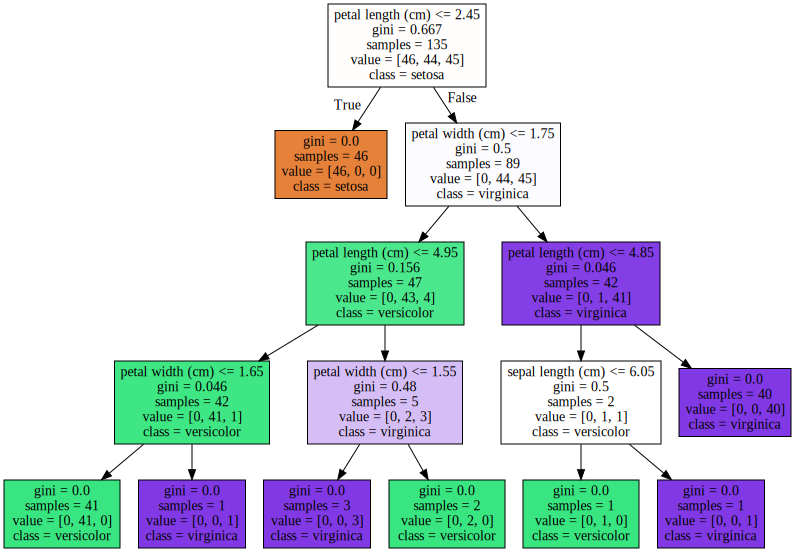

In [7]:
import graphviz
from sklearn.tree import export_graphviz
g = export_graphviz(clf, out_file=None, 
                    feature_names=iris["feature_names"],
                    class_names=iris["target_names"], filled=True)
graphviz.Source(g)

In [ ]:
# 驗證一下公式的好壞
# 預測(predict)
print("預測結果:", list(clf.predict(x_test)))
print("正確結果:", list(y_test))
# 衡量方法(sklearn.metrics)
from sklearn.metrics import accuracy_score
score = accuracy_score(clf.predict(x_test), y_test)
print("正確率:", score)